Importing Dependencies


In [1]:
import pandas as pd
import numpy as np

In [3]:
# Importing dataset
df = pd.read_csv('/content/drive/MyDrive/PROJECTS/Iris Classification/iris dataset/Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

We're going to predict using unsupervised learning so  we don't need the Species column. Let's remove it


In [7]:
iris_clustering = df.drop(columns=['Species'])

In [11]:
iris_clustering.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


Now, Features needs to be selected on which basis clusterung will be done.
Possible combos:
1. SepalLength vs Sepal width
2. sepal length vs petal length
3. sepal length vs petal width
4. sepal width vs petal length
5. sepal width vs petal width
7. petal lentgh vs petal width

# 1. SepalLength vs Sepal width

In [39]:
X = iris_clustering.iloc[:, [0, 1]].values # Taking values from column 0 and 1 from iris_clustering dataset

Choosing Number of Clusters

WCSS

In [40]:
# Elbow method to determine the optimum number of values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 11): # Checking 1 to 10 clusters of data
  Kmeans = KMeans(n_clusters=i, init='k-means++', random_state=24)
  Kmeans.fit(X)
  #  Appending the wcss values to the list
  wcss.append(Kmeans.inertia_) # Kmeans.inertia_ returns the wcss value for an initialized cluster



Plotting the elbow graph


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

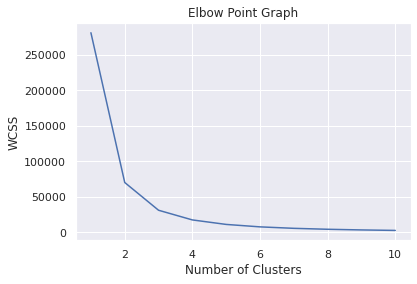

In [42]:
# Elbow Graph
sns.set()
plt.plot(range(1, 11), wcss)
plt.title("Elbow Point Graph")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

We can see WCSS value drops for 1, 2, 3 cluters but after 3 Wcss value decreases gradually.
As after 3 there is no significant amount of drop in wcss value , The optimum number of cluster is 3.

In [43]:
# initializing the K-Means with optimum number of clusters
Kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

In [45]:
# Fitting the datapoints to the kmeans function and returning label for each data points
y = Kmeans.fit_predict(X)

In [46]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


Visualizing the clusters

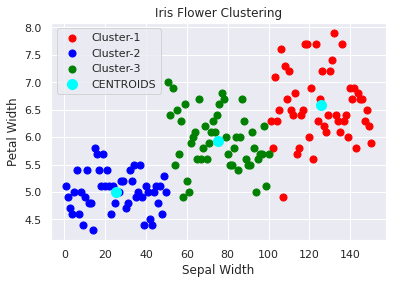

In [47]:
plt.scatter(X[y==0, 0], X[y==0, 1], s = 50, c = "red", label = "Cluster-1")
plt.scatter(X[y==1, 0], X[y==1, 1], s = 50, c = "blue", label = "Cluster-2")
plt.scatter(X[y==2, 0], X[y==2, 1], s = 50, c = "green", label = "Cluster-3")
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], s=100, c='cyan', label = "CENTROIDS")
plt.title("Iris Flower Clustering")
plt.xlabel('Sepal Width')
plt.ylabel("Petal Width")
plt.legend()
plt.show()

# 2. Sepal length vs Petal Length

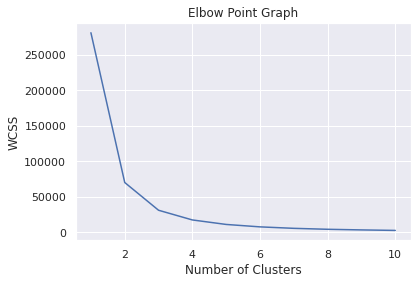

In [50]:
X = iris_clustering.iloc[:, [0, 2]].values # Taking values from column 0 and 1 from iris_clustering dataset
# Elbow method to determine the optimum number of values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 11): # Checking 1 to 10 clusters of data
  Kmeans = KMeans(n_clusters=i, init='k-means++', random_state=24)
  Kmeans.fit(X)
  #  Appending the wcss values to the list
  wcss.append(Kmeans.inertia_) # Kmeans.inertia_ returns the wcss value for an initialized cluster

# Elbow Graph
sns.set()
plt.plot(range(1, 11), wcss)
plt.title("Elbow Point Graph")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()



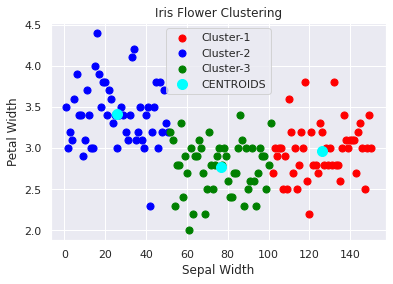

In [51]:

# initializing the K-Means with optimum number of clusters
Kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

# Fitting the datapoints to the kmeans function and returning label for each data points
y = Kmeans.fit_predict(X)

plt.scatter(X[y==0, 0], X[y==0, 1], s = 50, c = "red", label = "Cluster-1")
plt.scatter(X[y==1, 0], X[y==1, 1], s = 50, c = "blue", label = "Cluster-2")
plt.scatter(X[y==2, 0], X[y==2, 1], s = 50, c = "green", label = "Cluster-3")
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], s=100, c='cyan', label = "CENTROIDS")
plt.title("Iris Flower Clustering")
plt.xlabel('Sepal Width')
plt.ylabel("Petal Width")
plt.legend()
plt.show()


# 3. Sepal Length vs Petal Width

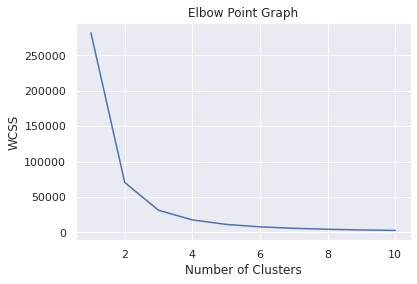

In [52]:
X = iris_clustering.iloc[:, [0, 3]].values # Taking values from column 0 and 1 from iris_clustering dataset
# Elbow method to determine the optimum number of values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 11): # Checking 1 to 10 clusters of data
  Kmeans = KMeans(n_clusters=i, init='k-means++', random_state=24)
  Kmeans.fit(X)
  #  Appending the wcss values to the list
  wcss.append(Kmeans.inertia_) # Kmeans.inertia_ returns the wcss value for an initialized cluster

# Elbow Graph
sns.set()
plt.plot(range(1, 11), wcss)
plt.title("Elbow Point Graph")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

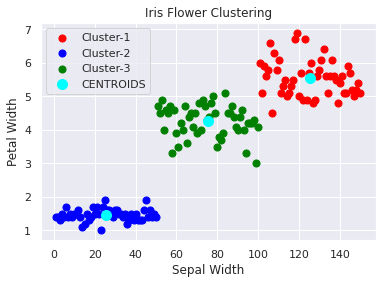

In [53]:
# initializing the K-Means with optimum number of clusters
Kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

# Fitting the datapoints to the kmeans function and returning label for each data points
y = Kmeans.fit_predict(X)

plt.scatter(X[y==0, 0], X[y==0, 1], s = 50, c = "red", label = "Cluster-1")
plt.scatter(X[y==1, 0], X[y==1, 1], s = 50, c = "blue", label = "Cluster-2")
plt.scatter(X[y==2, 0], X[y==2, 1], s = 50, c = "green", label = "Cluster-3")
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], s=100, c='cyan', label = "CENTROIDS")
plt.title("Iris Flower Clustering")
plt.xlabel('Sepal Width')
plt.ylabel("Petal Width")
plt.legend()
plt.show()


# 4. Sepal width vs Petal Length

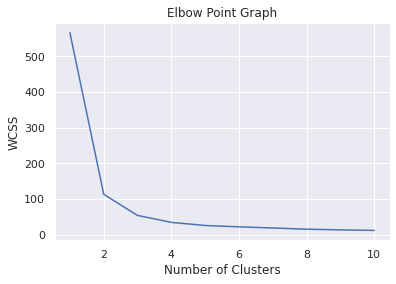

In [54]:
X = iris_clustering.iloc[:, [1, 3]].values # Taking values from column 0 and 1 from iris_clustering dataset
# Elbow method to determine the optimum number of values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 11): # Checking 1 to 10 clusters of data
  Kmeans = KMeans(n_clusters=i, init='k-means++', random_state=24)
  Kmeans.fit(X)
  #  Appending the wcss values to the list
  wcss.append(Kmeans.inertia_) # Kmeans.inertia_ returns the wcss value for an initialized cluster

# Elbow Graph
sns.set()
plt.plot(range(1, 11), wcss)
plt.title("Elbow Point Graph")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

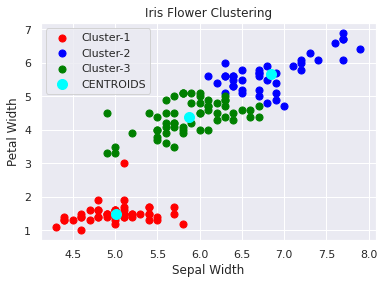

In [55]:
# initializing the K-Means with optimum number of clusters
Kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

# Fitting the datapoints to the kmeans function and returning label for each data points
y = Kmeans.fit_predict(X)

plt.scatter(X[y==0, 0], X[y==0, 1], s = 50, c = "red", label = "Cluster-1")
plt.scatter(X[y==1, 0], X[y==1, 1], s = 50, c = "blue", label = "Cluster-2")
plt.scatter(X[y==2, 0], X[y==2, 1], s = 50, c = "green", label = "Cluster-3")
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], s=100, c='cyan', label = "CENTROIDS")
plt.title("Iris Flower Clustering")
plt.xlabel('Sepal Width')
plt.ylabel("Petal Width")
plt.legend()
plt.show()

# 5. Sepal Width vs Petal Width

In [13]:
X = iris_clustering.iloc[:, [1, 3]].values # Taking values from column 1 and 3 from iris_clustering dataset

In [14]:
print(X)

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.5 4.4]

Choosing number of clusters

WCSS - Withis Clusters Sum of Squares

In [15]:
# Elbow method to determine the optimum number of values
from sklearn.cluster import KMeans

In [19]:
wcss=[]
for i in range(1, 11): # Checking 1 to 10 clusters of data
  Kmeans = KMeans(n_clusters=i, init='k-means++', random_state=24)
  Kmeans.fit(X)
  #  Appending the wcss values to the list
  wcss.append(Kmeans.inertia_) # Kmeans.inertia_ returns the wcss value for an initialized cluster

Plotting the Elbow Graph

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

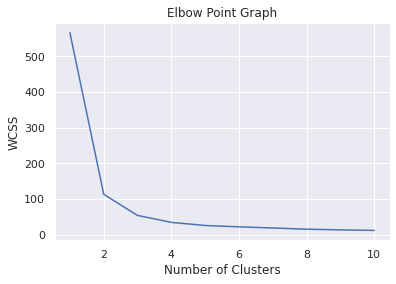

In [22]:
# Elbow Graph
sns.set()
plt.plot(range(1, 11), wcss)
plt.title("Elbow Point Graph")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

We can see WCSS value drops for 1, 2, 3 cluters but after 3 Wcss value decreases gradually.
As after 3 there is no significant amount of drop in wcss value , The optimum number of cluster is 3.

In [25]:
# initializing the K-Means with optimum number of clusters
Kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

In [27]:
# Fitting the datapoints to the kmeans function and returning label for each data points
y = Kmeans.fit_predict(X)

In [28]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


Visualizing the Clusters

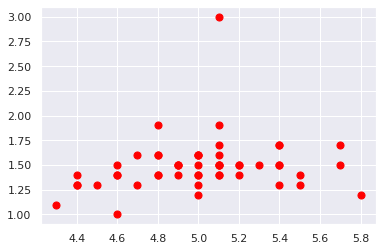

In [33]:
# Scatter plot for (x, y) with label 0 as cluster 1 in color red
plt.scatter(X[y==0, 0], X[y==0, 1], s = 50, c = "red", label = "Cluster-1")

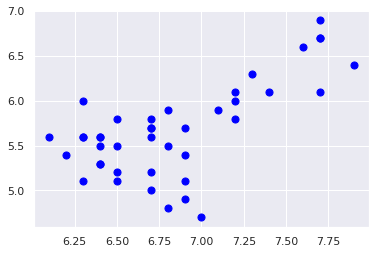

In [34]:
# Scatter plot for (x, y) with label 1 as cluster 2 in color red
plt.scatter(X[y==1, 0], X[y==1, 1], s = 50, c = "blue", label = "Cluster-2")

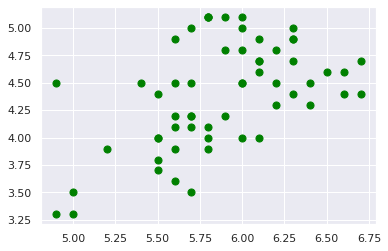

In [35]:
# Scatter plot for (x, y) with label 2 as cluster 3 in color green
plt.scatter(X[y==2, 0], X[y==2, 1], s = 50, c = "green", label = "Cluster-3")

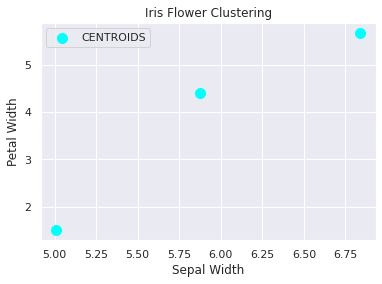

In [37]:
# Plotting the centroid of clusters
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], s=100, c='cyan', label = "CENTROIDS")
plt.title("Iris Flower Clustering")
plt.xlabel('Sepal Width')
plt.ylabel("Petal Width")
plt.show()

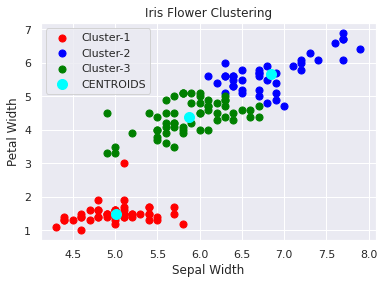

In [38]:
plt.scatter(X[y==0, 0], X[y==0, 1], s = 50, c = "red", label = "Cluster-1")
plt.scatter(X[y==1, 0], X[y==1, 1], s = 50, c = "blue", label = "Cluster-2")
plt.scatter(X[y==2, 0], X[y==2, 1], s = 50, c = "green", label = "Cluster-3")
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], s=100, c='cyan', label = "CENTROIDS")
plt.title("Iris Flower Clustering")
plt.xlabel('Sepal Width')
plt.ylabel("Petal Width")
plt.legend()
plt.show()

# 6. Petal Length vs Petal Width

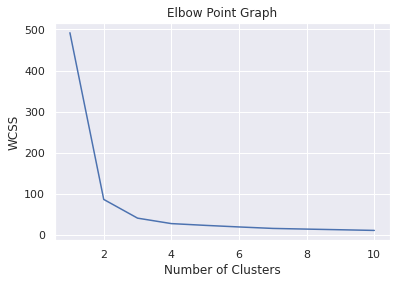

In [56]:
X = iris_clustering.iloc[:, [2, 3]].values # Taking values from column 0 and 1 from iris_clustering dataset
# Elbow method to determine the optimum number of values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 11): # Checking 1 to 10 clusters of data
  Kmeans = KMeans(n_clusters=i, init='k-means++', random_state=24)
  Kmeans.fit(X)
  #  Appending the wcss values to the list
  wcss.append(Kmeans.inertia_) # Kmeans.inertia_ returns the wcss value for an initialized cluster

# Elbow Graph
sns.set()
plt.plot(range(1, 11), wcss)
plt.title("Elbow Point Graph")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

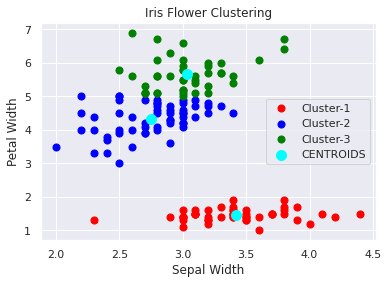

In [57]:
# initializing the K-Means with optimum number of clusters
Kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

# Fitting the datapoints to the kmeans function and returning label for each data points
y = Kmeans.fit_predict(X)

plt.scatter(X[y==0, 0], X[y==0, 1], s = 50, c = "red", label = "Cluster-1")
plt.scatter(X[y==1, 0], X[y==1, 1], s = 50, c = "blue", label = "Cluster-2")
plt.scatter(X[y==2, 0], X[y==2, 1], s = 50, c = "green", label = "Cluster-3")
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], s=100, c='cyan', label = "CENTROIDS")
plt.title("Iris Flower Clustering")
plt.xlabel('Sepal Width')
plt.ylabel("Petal Width")
plt.legend()
plt.show()

# # Conclusion :


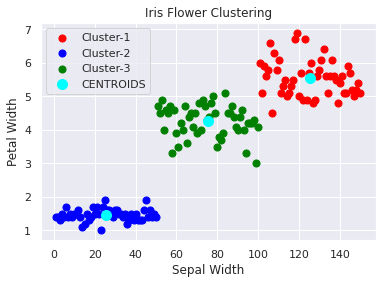

This is the clustering of Sepal Length vs Petal Width Clustering. We can clearly see that three clusters are distuinguished far better than any other combinations clusters.